<a href="https://colab.research.google.com/github/LeonardooBecker/TA3-VisaoComputacional/blob/main/TA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import glob

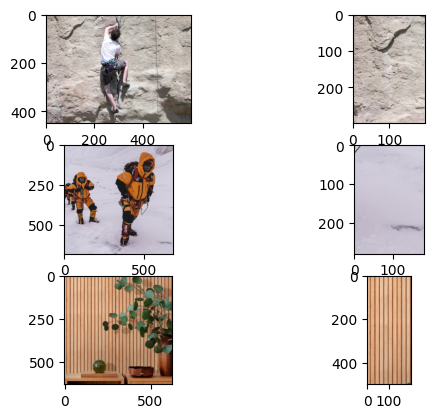

In [ ]:
escalador = cv.imread('./escalador.jpeg')
escalador = cv.cvtColor(escalador, cv.COLOR_BGR2RGB)
escalador_hsv = cv.cvtColor(escalador, cv.COLOR_BGR2HSV)

roi_escalador = escalador[0:300,0:200]
roi_escalador_hsv = cv.cvtColor(roi_escalador, cv.COLOR_BGR2HSV)


alpinista = cv.imread('./alpinista.jpeg')
alpinista = cv.cvtColor(alpinista, cv.COLOR_BGR2RGB)
alpinista_hsv = cv.cvtColor(alpinista, cv.COLOR_BGR2HSV)

roi_alpinista = alpinista[400:680,500:680]
roi_alpinista_hsv = cv.cvtColor(roi_alpinista, cv.COLOR_BGR2HSV)

parede = cv.imread('./parede.jpeg')
parede = cv.cvtColor(parede, cv.COLOR_BGR2RGB)
parede_hsv = cv.cvtColor(parede, cv.COLOR_BGR2HSV)

roi_parede = parede[0:500,0:200]
roi_parede_hsv = cv.cvtColor(roi_parede, cv.COLOR_BGR2HSV)

fig, axes = plt.subplots(3, 2)
axes[0][0].imshow(escalador)
axes[0][1].imshow(roi_escalador)
axes[1][0].imshow(alpinista)
axes[1][1].imshow(roi_alpinista)
axes[2][0].imshow(parede)
axes[2][1].imshow(roi_parede)



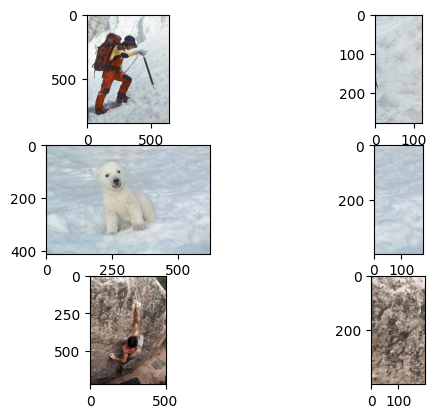

In [ ]:
alpinista2 = cv.imread('./alpinista2.jpeg')
alpinista2 = cv.cvtColor(alpinista2, cv.COLOR_BGR2RGB)
alpinista2_hsv = cv.cvtColor(alpinista2, cv.COLOR_BGR2HSV)

roi_alpinista2 = alpinista2[400:680,520:680]
roi_alpinista2_hsv = cv.cvtColor(roi_alpinista2, cv.COLOR_BGR2HSV)

ursopolar = cv.imread('./ursopolar.jpeg')
ursopolar = cv.cvtColor(ursopolar, cv.COLOR_BGR2RGB)
ursopolar_hsv = cv.cvtColor(ursopolar, cv.COLOR_BGR2HSV)

roi_ursopolar = ursopolar[0:400,420:600]
roi_ursopolar2 = ursopolar[0:400,0:200]
roi_ursopolar_hsv = cv.cvtColor(roi_ursopolar, cv.COLOR_BGR2HSV)
roi_ursopolar2_hsv = cv.cvtColor(roi_ursopolar2, cv.COLOR_BGR2HSV)

escalador2 = cv.imread('./escalador2.jpeg')
escalador2 = cv.cvtColor(escalador2, cv.COLOR_BGR2RGB)
escalador2_hsv = cv.cvtColor(escalador2, cv.COLOR_BGR2HSV)

roi_escalador2 = escalador2[0:400,0:200]
roi_escalador2_hsv = cv.cvtColor(roi_escalador2, cv.COLOR_BGR2HSV)
fig, axes = plt.subplots(3, 2)

axes[0][0].imshow(alpinista2)
axes[0][1].imshow(roi_alpinista2)
axes[1][0].imshow(ursopolar)
axes[1][1].imshow(roi_ursopolar)
axes[2][0].imshow(escalador2)
axes[2][1].imshow(roi_escalador2)

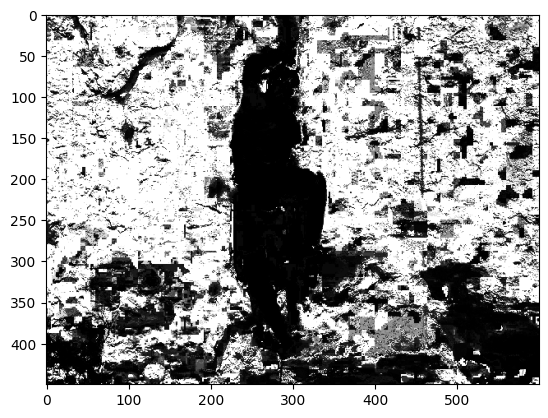

In [ ]:
roi_escalador_hsv = cv.calcHist([roi_escalador_hsv], [0,1], None, [180,256], [0, 180, 0, 256])
mask_escalador = cv.calcBackProject([escalador_hsv], [0,1], roi_escalador_hsv, [0,180,0,256], 1)
plt.imshow(mask_escalador, 'gray')

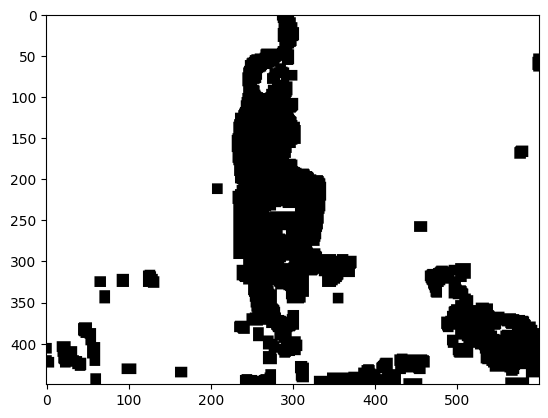

In [ ]:
kernel_escalador = np.ones((13,13), dtype=np.uint8)
closing_escalador = cv.morphologyEx(mask_escalador, cv.MORPH_CLOSE, kernel_escalador)
th, mask_escalador_thresh = cv.threshold(closing_escalador, 50, 255, cv.THRESH_BINARY)
plt.imshow(mask_escalador_thresh, 'gray')

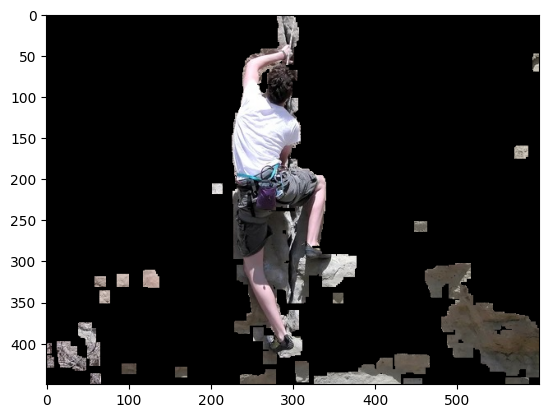

In [ ]:
mask_escalador_inverted = cv.bitwise_not(mask_escalador_thresh)
result_escalador = cv.bitwise_and(escalador, escalador, mask= mask_escalador_inverted)
plt.imshow(result_escalador)

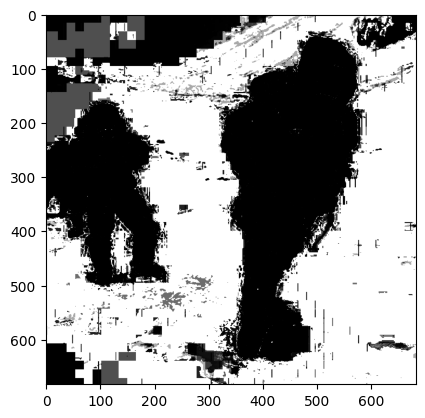

In [ ]:
roi_alpinista_hsv = cv.calcHist([roi_alpinista_hsv], [0,1], None, [180,256], [0, 180, 0, 256])
mask_alpinista = cv.calcBackProject([alpinista_hsv], [0,1], roi_alpinista_hsv, [0,180,0,256], 1)
plt.imshow(mask_alpinista, 'gray')

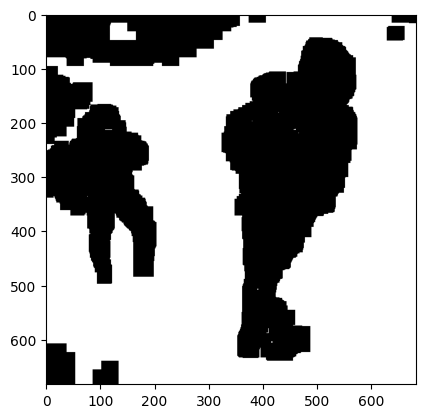

In [ ]:
kernel_alpinista = np.ones((25,25), dtype=np.uint8)
closing_alpinista = cv.morphologyEx(mask_alpinista, cv.MORPH_CLOSE, kernel_alpinista)
th, mask_alpinista_thresh = cv.threshold(closing_alpinista, 100, 255, cv.THRESH_BINARY)
plt.imshow(mask_alpinista_thresh, 'gray')

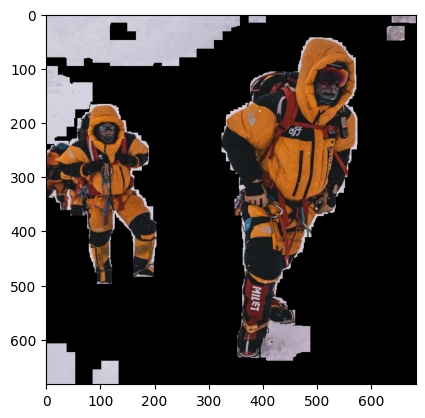

In [ ]:
mask_alpinista_inverted = cv.bitwise_not(mask_alpinista_thresh)
result_alpinista = cv.bitwise_and(alpinista, alpinista, mask= mask_alpinista_inverted)
plt.imshow(result_alpinista)

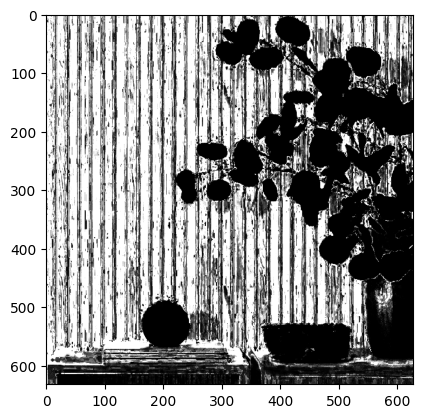

In [ ]:
roi_parede_hsv = cv.calcHist([roi_parede_hsv], [0,1], None, [180,256], [0, 180, 0, 256])
mask_parede = cv.calcBackProject([parede_hsv], [0,1], roi_parede_hsv, [0,180,0,256], 1)
plt.imshow(mask_parede, 'gray')

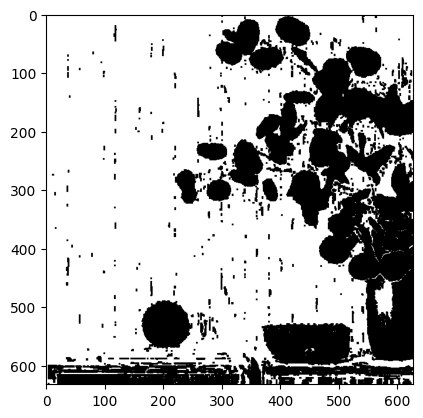

In [ ]:
kernel_parede = np.ones((3,3), dtype=np.uint8)
closing_parede = cv.morphologyEx(mask_parede, cv.MORPH_CLOSE, kernel_parede)
th, mask_parede_thresh = cv.threshold(closing_parede, 50, 255, cv.THRESH_BINARY)
plt.imshow(mask_parede_thresh, 'gray')

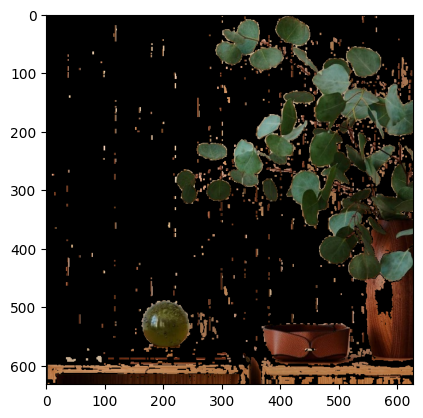

In [ ]:
mask_parede_inverted = cv.bitwise_not(mask_parede_thresh)
result_parede = cv.bitwise_and(parede, parede, mask= mask_parede_inverted)
plt.imshow(result_parede)

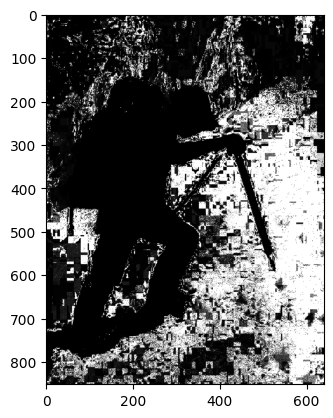

In [ ]:
roi_alpinista2_hsv = cv.calcHist([roi_alpinista2_hsv], [0,1], None, [180,256], [0, 180, 0, 256])
mask_alpinista2 = cv.calcBackProject([alpinista2_hsv], [0,1], roi_alpinista2_hsv, [0,180,0,256], 1)
plt.imshow(mask_alpinista2, 'gray')

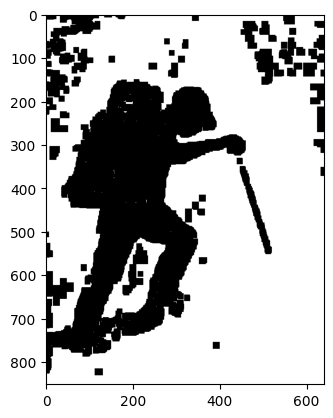

In [ ]:
kernel_alpinista2 = np.ones((13,13), dtype=np.uint8)
closing_alpinista2 = cv.morphologyEx(mask_alpinista2, cv.MORPH_CLOSE, kernel_alpinista2)
th, mask_alpinista2_thresh = cv.threshold(closing_alpinista2, 5, 255, cv.THRESH_BINARY)
plt.imshow(mask_alpinista2_thresh, 'gray')

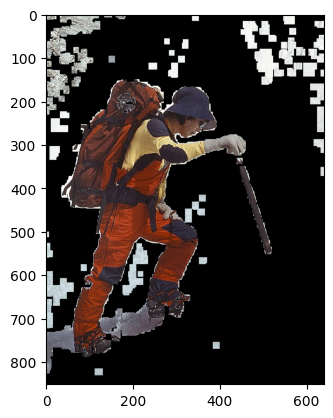

In [ ]:
mask_alpinista2_inverted = cv.bitwise_not(mask_alpinista2_thresh)
result_alpinista2 = cv.bitwise_and(alpinista2, alpinista2, mask= mask_alpinista2_inverted)
plt.imshow(result_alpinista2)

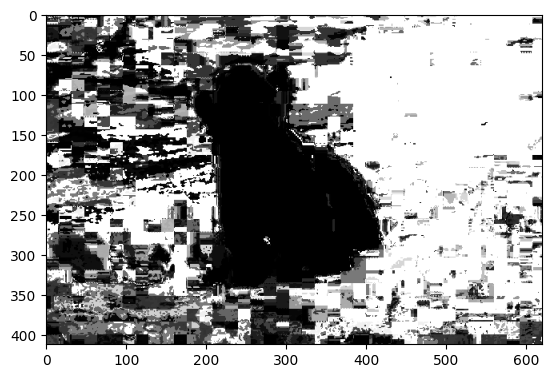

In [ ]:
roi_ursopolar_hsv = cv.calcHist([roi_ursopolar_hsv], [0,1], None, [180,256], [0, 180, 0, 256])
mask_ursopolar = cv.calcBackProject([ursopolar_hsv], [0,1], roi_ursopolar_hsv, [0,180,0,256], 1)
plt.imshow(mask_ursopolar, 'gray')

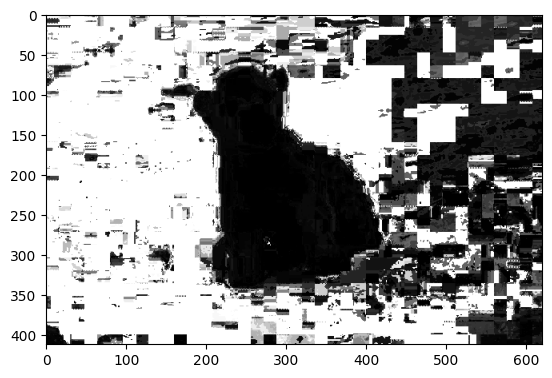

In [ ]:
roi_ursopolar2_hsv = cv.calcHist([roi_ursopolar2_hsv], [0,1], None, [180,256], [0, 180, 0, 256])
mask_ursopolar2 = cv.calcBackProject([ursopolar_hsv], [0,1], roi_ursopolar2_hsv, [0,180,0,256], 1)
plt.imshow(mask_ursopolar2, 'gray')

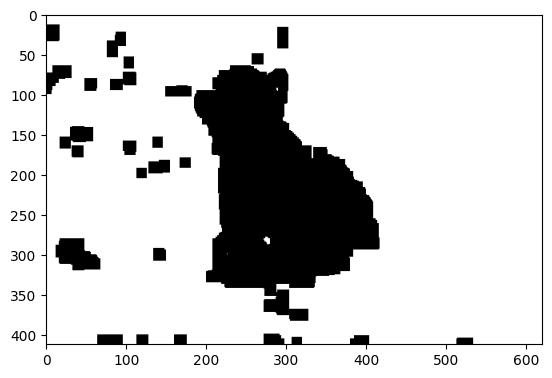

In [ ]:
kernel_ursopolar = np.ones((13,13), dtype=np.uint8)
closing_ursopolar = cv.morphologyEx(mask_ursopolar, cv.MORPH_CLOSE, kernel_ursopolar)
th, mask_ursopolar_thresh = cv.threshold(closing_ursopolar, 50, 255, cv.THRESH_BINARY)
plt.imshow(mask_ursopolar_thresh, 'gray')

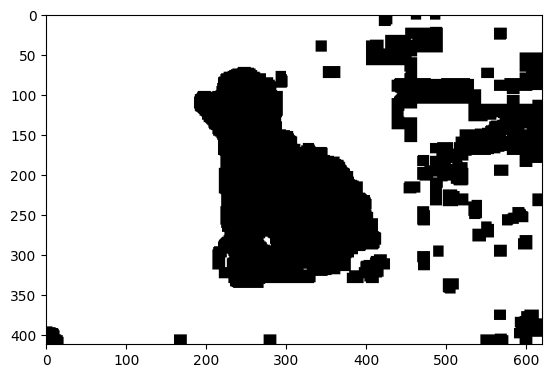

In [ ]:
kernel_ursopolar2 = np.ones((13,13), dtype=np.uint8)
closing_ursopolar2 = cv.morphologyEx(mask_ursopolar2, cv.MORPH_CLOSE, kernel_ursopolar2)
th, mask_ursopolar2_thresh = cv.threshold(closing_ursopolar2, 45, 255, cv.THRESH_BINARY)
plt.imshow(mask_ursopolar2_thresh, 'gray')

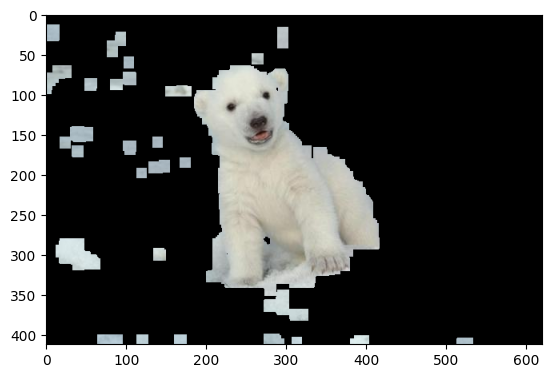

In [ ]:
mask_ursopolar_inverted = cv.bitwise_not(mask_ursopolar_thresh)
result_ursopolar = cv.bitwise_and(ursopolar, ursopolar, mask= mask_ursopolar_inverted)
plt.imshow(result_ursopolar)

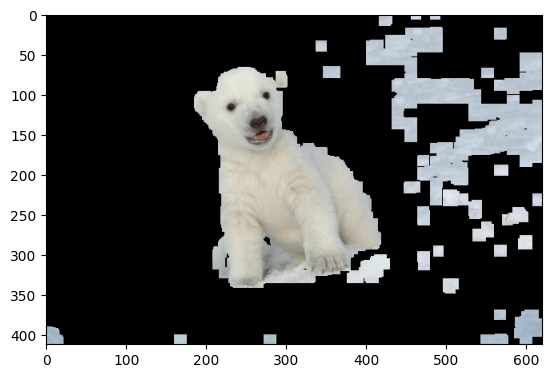

In [ ]:
mask_ursopolar2_inverted = cv.bitwise_not(mask_ursopolar2_thresh)
result_ursopolar2 = cv.bitwise_and(ursopolar, ursopolar, mask= mask_ursopolar2_inverted)
plt.imshow(result_ursopolar2)

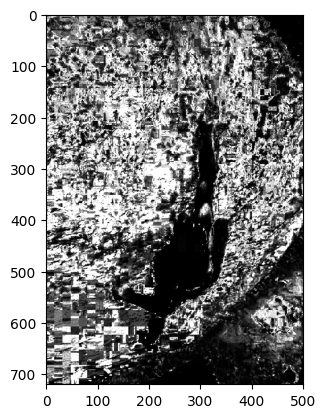

In [ ]:
roi_escalador2_hsv = cv.calcHist([roi_escalador2_hsv], [0,1], None, [180,256], [0, 180, 0, 256])
mask_escalador2 = cv.calcBackProject([escalador2_hsv], [0,1], roi_escalador2_hsv, [0,180,0,256], 1)
plt.imshow(mask_escalador2, 'gray')

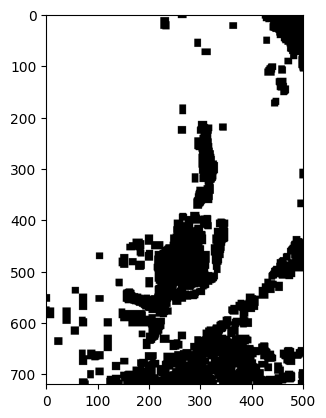

In [ ]:
kernel_escalador2 = np.ones((13,13), dtype=np.uint8)
closing_escalador2 = cv.morphologyEx(mask_escalador2, cv.MORPH_CLOSE, kernel_escalador2)
th, mask_escalador2_thresh = cv.threshold(closing_escalador2, 100, 255, cv.THRESH_BINARY)
plt.imshow(mask_escalador2_thresh, 'gray')

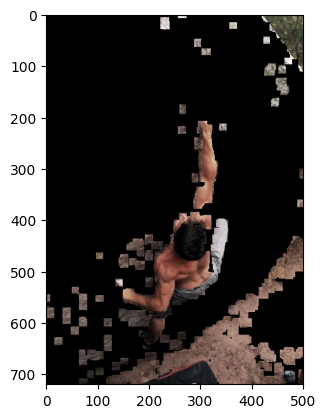

In [ ]:
mask_escalador2_inverted = cv.bitwise_not(mask_escalador2_thresh)
result_escalador2 = cv.bitwise_and(escalador2, escalador2, mask= mask_escalador2_inverted)
plt.imshow(result_escalador2)